<a href="https://colab.research.google.com/github/williamalbert94/Robodk-CNN-for-segmentation/blob/main/Inference_deeplab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Packages

In [ ]:
import tensorflow as tf
print(tf.__version__)
!pip install keras==2.2.4
import keras as k
print(k.__version__)
!pip install tensorflow==1.13.0-rc2

!pip install h5py==2.10.0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.0-rc2


Using TensorFlow backend.


2.2.4


#Change directory

In [ ]:
import os
def change_dir(path_in):
  GOOGLE_COLAB = True
  path = ""
  if GOOGLE_COLAB:
      from google.colab import drive # Load the Drive helper and mount
      from google.colab import files # Load files
      drive.mount('/content/drive') # This will prompt for authorization.
      path = path_in
  else:
      path  ='.'
  os.chdir(path)    
train_path = '/content/drive/My Drive/Pedro_CNN_tesis/Notebooks/deeplab'
change_dir(path_in = train_path)

Mounted at /content/drive


# Load Model and weigths 

In [ ]:
from get_model import *
train_path = '/content/drive/My Drive/Pedro_CNN_tesis/Notebooks/deeplab'
change_dir(path_in = train_path)
model = model_define(512,512,12,"Deeplabv3_Mobilenet",None)
model.load_weights("./new_dataMN.h5")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
fcfInput (InputLayer)           (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 256, 256, 32) 864         fcfInput[0][0]                   
__________________________________________________________________________________________________
Conv_BN (BatchNormalization)    (None, 256, 256, 32) 128         Conv[0][0]                       
__________________________________________________________________________________________________
Conv_Relu6 (Activation)         (None, 256, 256, 32) 0           Conv_BN[0][0] 

#List test images

In [ ]:
import pandas as pd
import cv2

In [ ]:
test_dataframe = pd.read_csv('./test_paths.csv')
test_dataframe = test_dataframe['Path'].values

#Use model for inference

In [ ]:
train_path = '/content/drive/My Drive/Pedro_CNN_tesis/Dataset_pedro/'
change_dir(path_in = train_path)
i = 0
true = None
predict_out = None
f1_score_out = []
recall_out = []
precision_out = []
image_name = []
path=[]
for indexs in test_dataframe:
  img_name = indexs.split('/')[-1]
  path_img = './Images/{}'.format(img_name)
  path_mask = './Mask/{}'.format(img_name)
  #print(img_name)
  x = cv2.imread(path_img,cv2.IMREAD_ANYDEPTH)
  x = cv2.resize(x, (512,512) , interpolation = cv2.INTER_NEAREST)

  y_true = cv2.imread(path_mask,cv2.IMREAD_ANYDEPTH)
  y_true = cv2.resize(y_true, (512,512) , interpolation = cv2.INTER_NEAREST)
  y_true = np.expand_dims(y_true,axis=0)
  x=x/255
  x=np.stack((x,)*3, axis=-1)
  x = np.expand_dims(x,axis=0)
  preds = model.predict(x)
  preds = np.argmax(preds,axis=-1)  
  y_true= y_true.reshape(-1,1) 
  y_true[y_true==13]=11
  preds= preds.reshape(-1,1) 
  #print(np.unique(preds))  
  #print(preds.shape)
  if true is None:
    true = y_true
  else:
    true = np.concatenate((true,y_true),axis=0)
    
  if predict_out is None:
    predict_out = preds
  else:
    predict_out = np.concatenate((predict_out,preds),axis=0)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Metrics

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
var_1 = classification_report(true, predict_out, output_dict=True)
df = pd.DataFrame(var_1).transpose()
df.to_csv('./report_metrics.csv', index = False, header=True)
df

,precision,recall,f1-score,support
0,0.998266,0.998073,0.998170,4.454116e+07
1,0.985686,0.983668,0.984676,2.153430e+05
2,0.972595,0.981523,0.977039,1.863930e+05
3,0.958731,0.945196,0.951915,1.032770e+05
4,0.940316,0.956421,0.948300,1.066120e+05
5,0.814893,0.868736,0.840954,1.337000e+05
6,0.812307,0.723564,0.765371,3.740100e+04
7,0.812505,0.858252,0.834752,7.676300e+04
8,0.990702,0.973957,0.982258,2.328060e+05
9,0.754851,0.787872,0.771008,4.818800e+04


# Visual Result

In [ ]:
import matplotlib.pyplot as plt
Current_class = 0

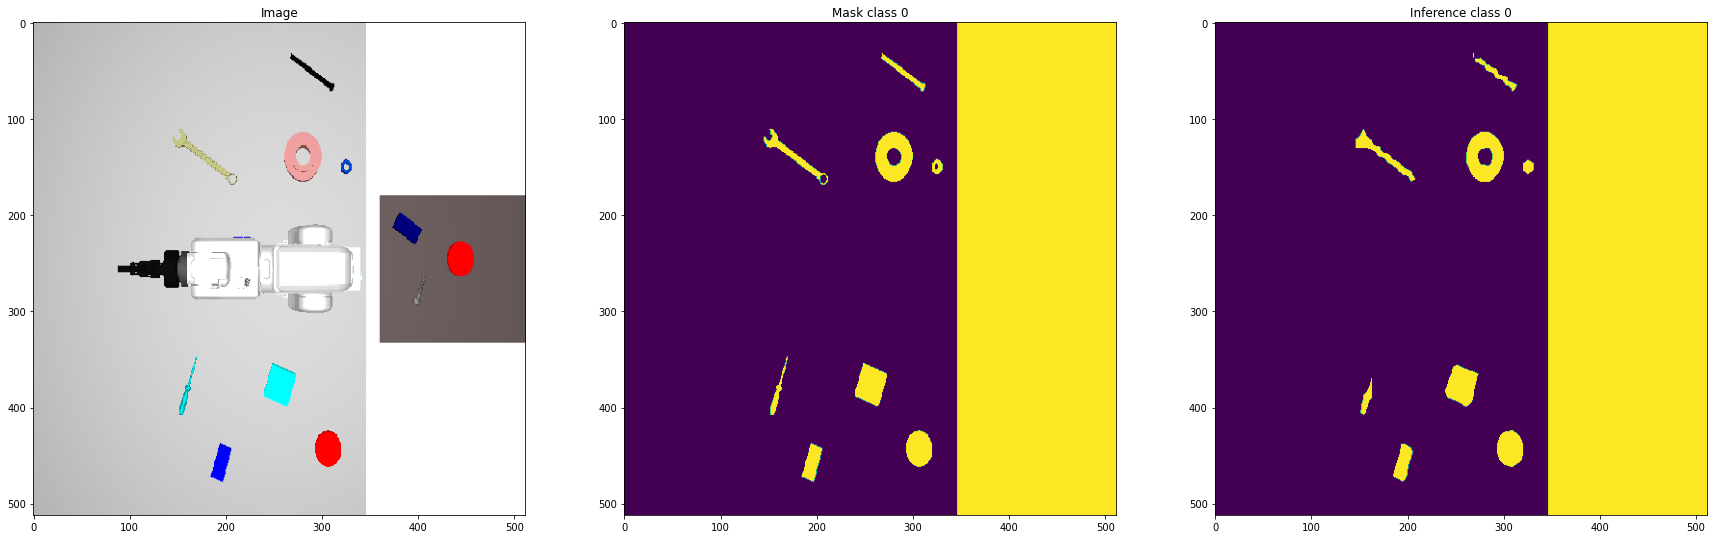

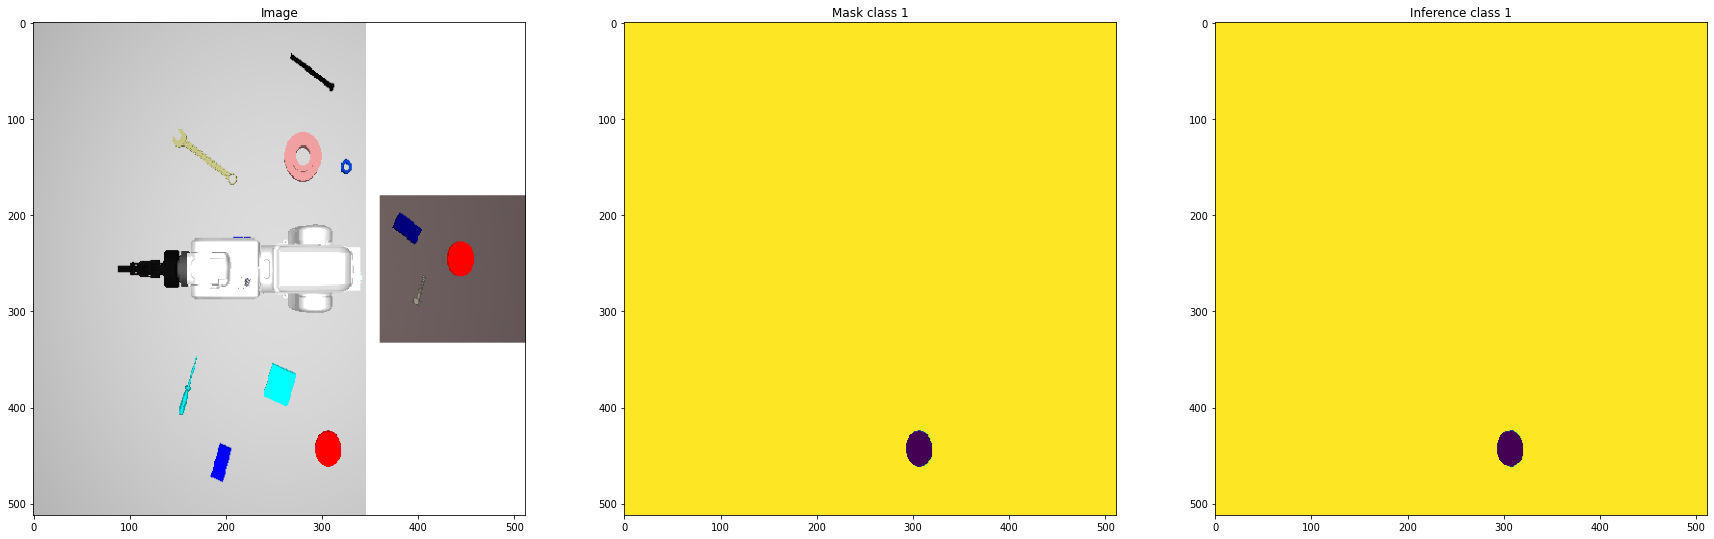

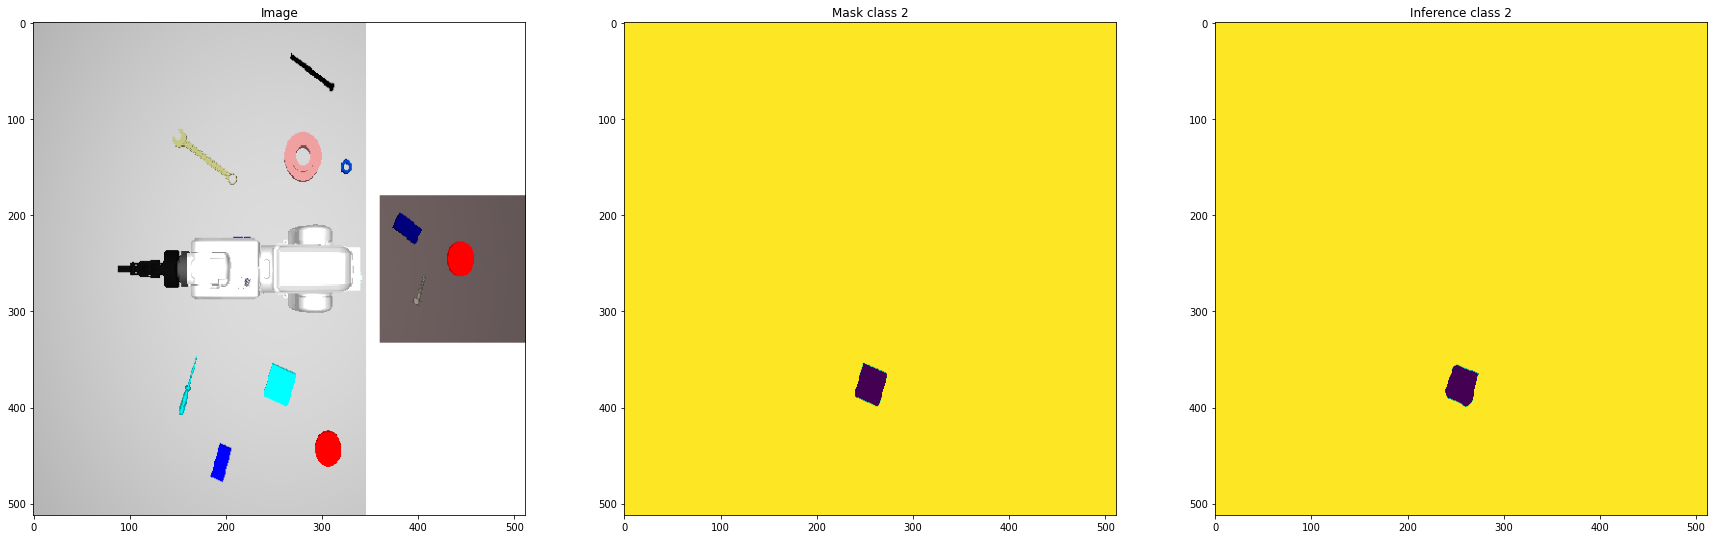

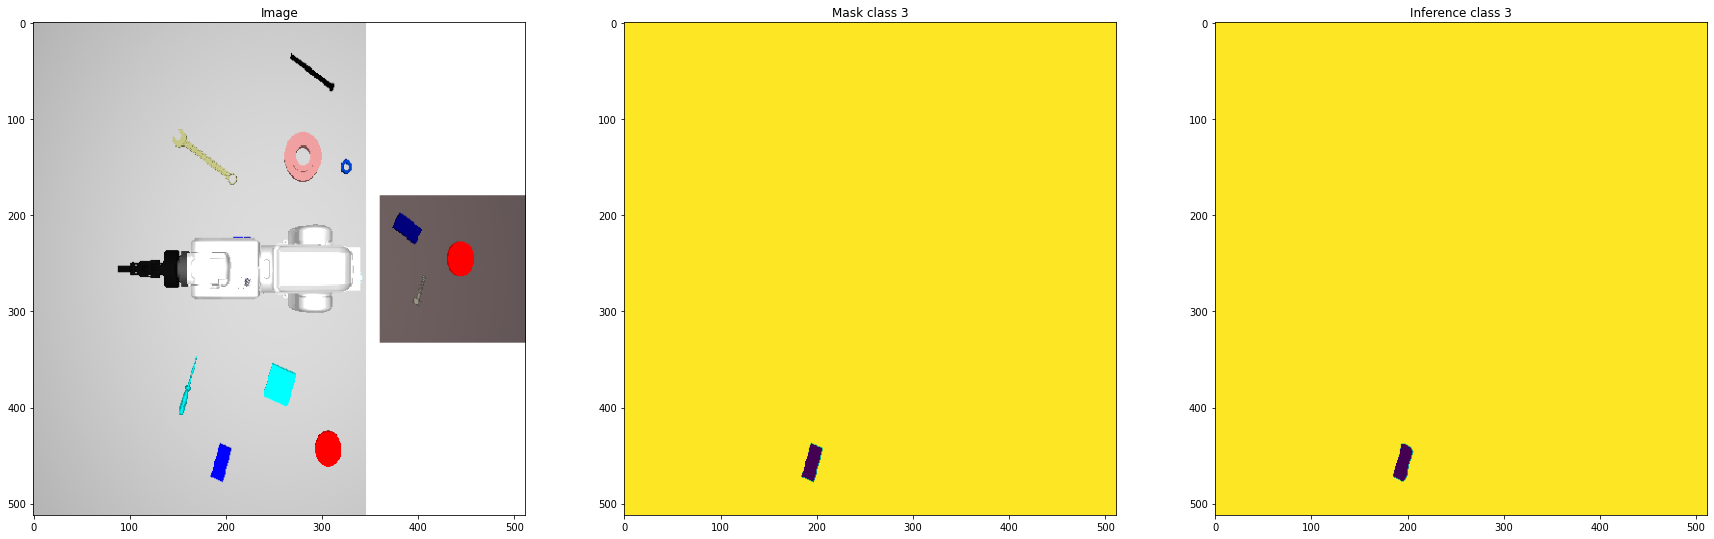

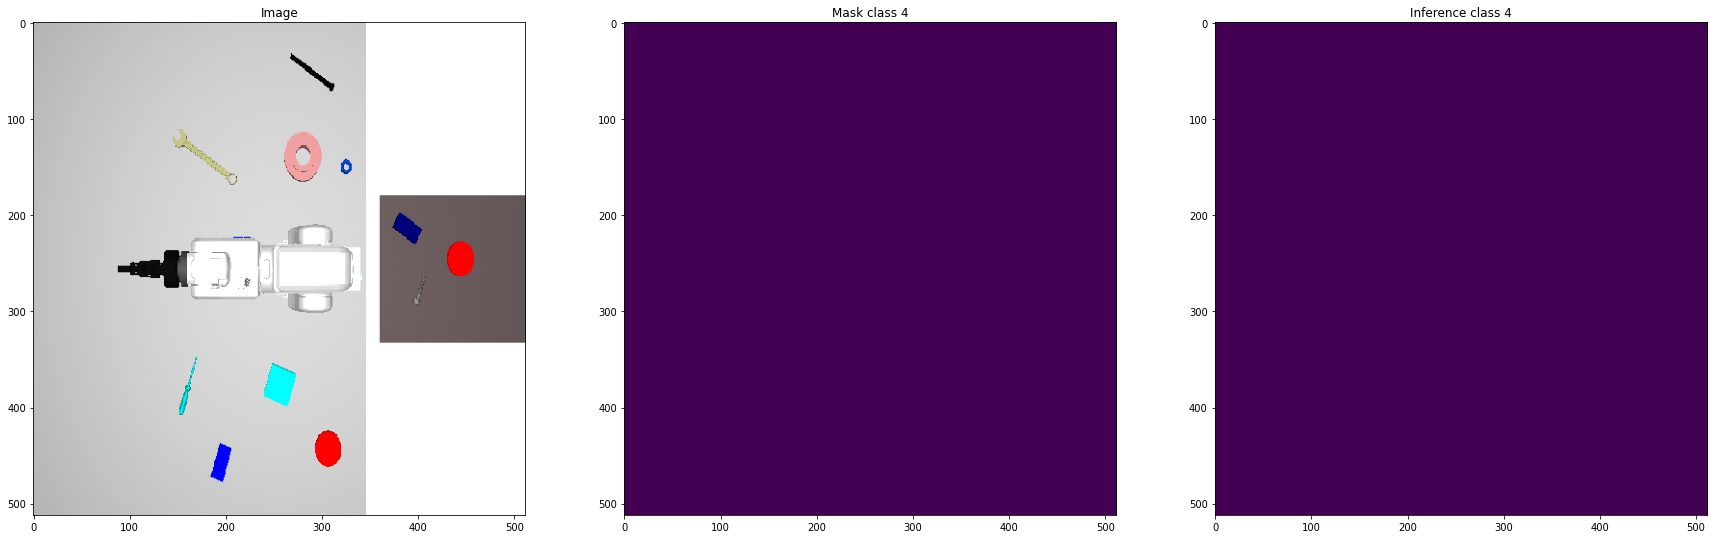

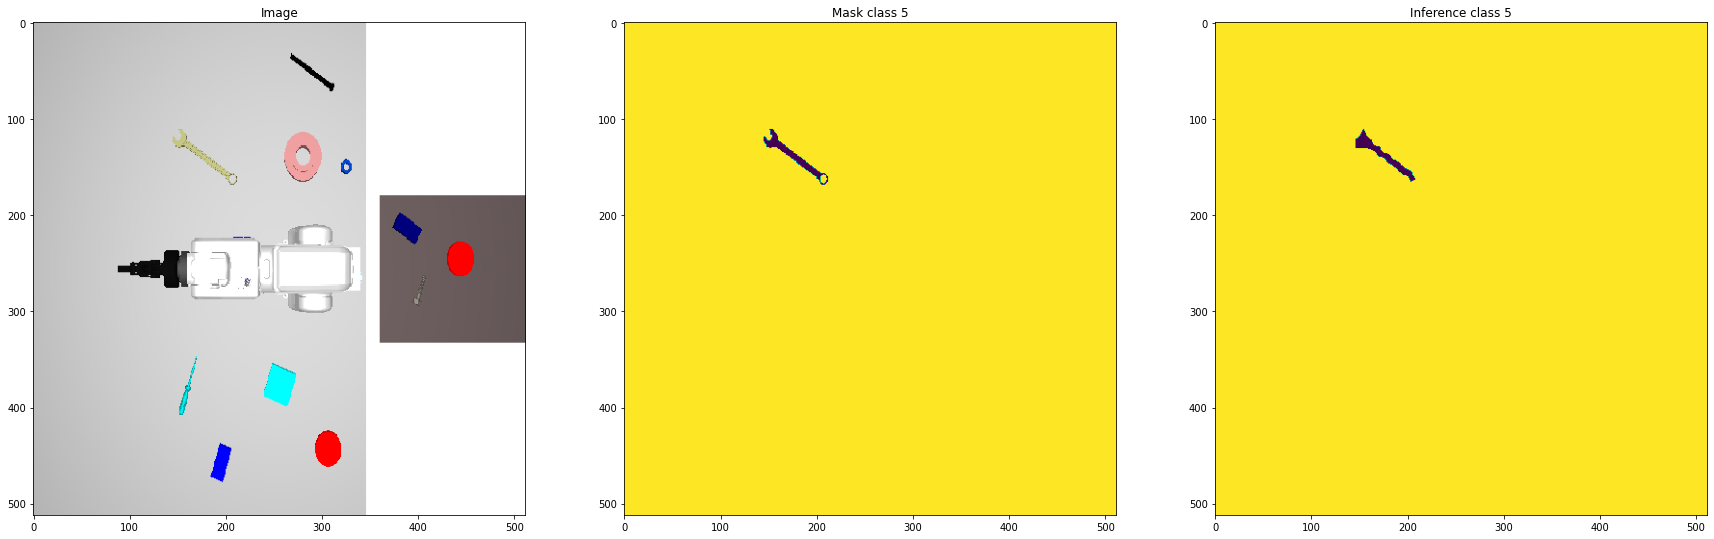

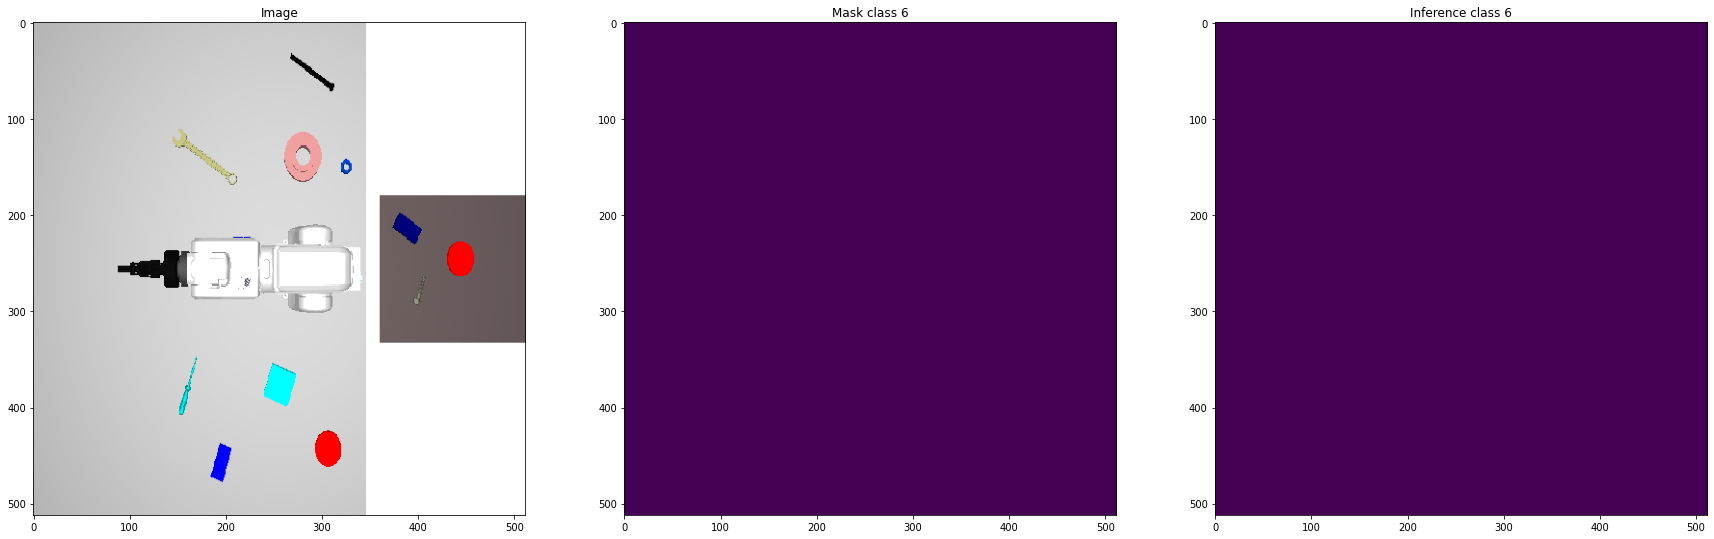

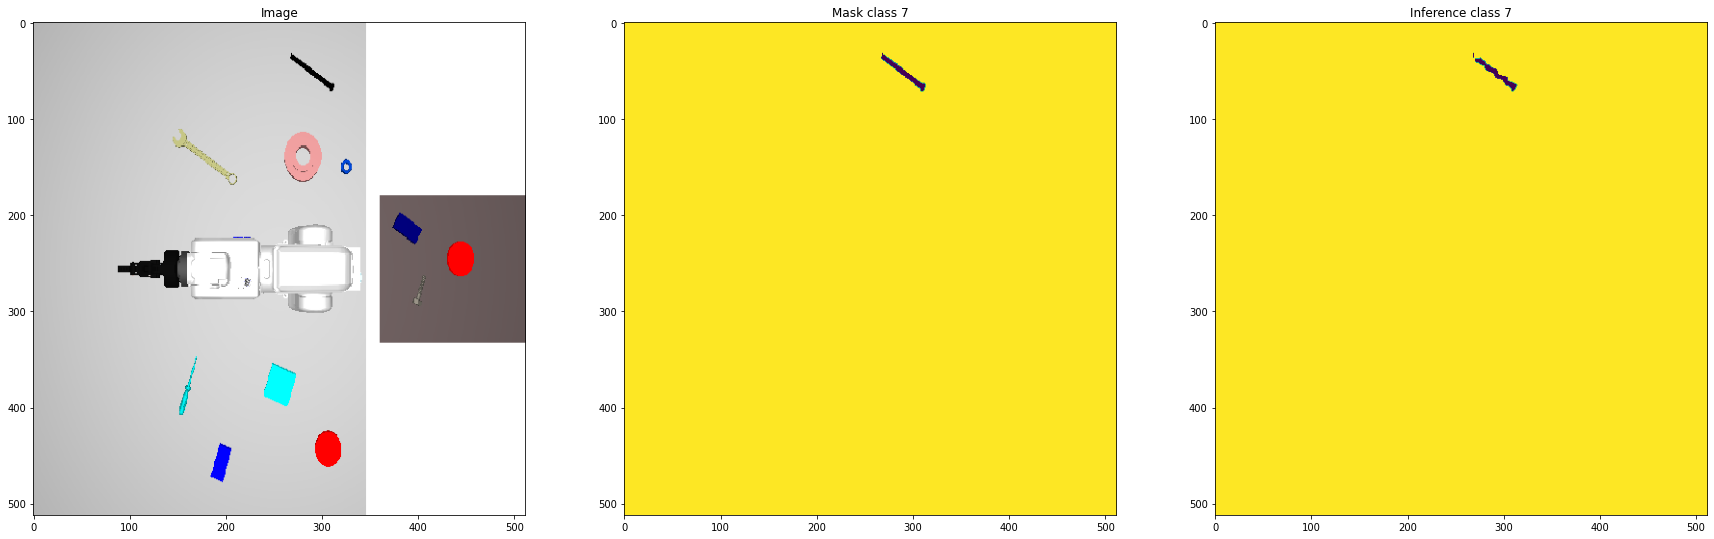

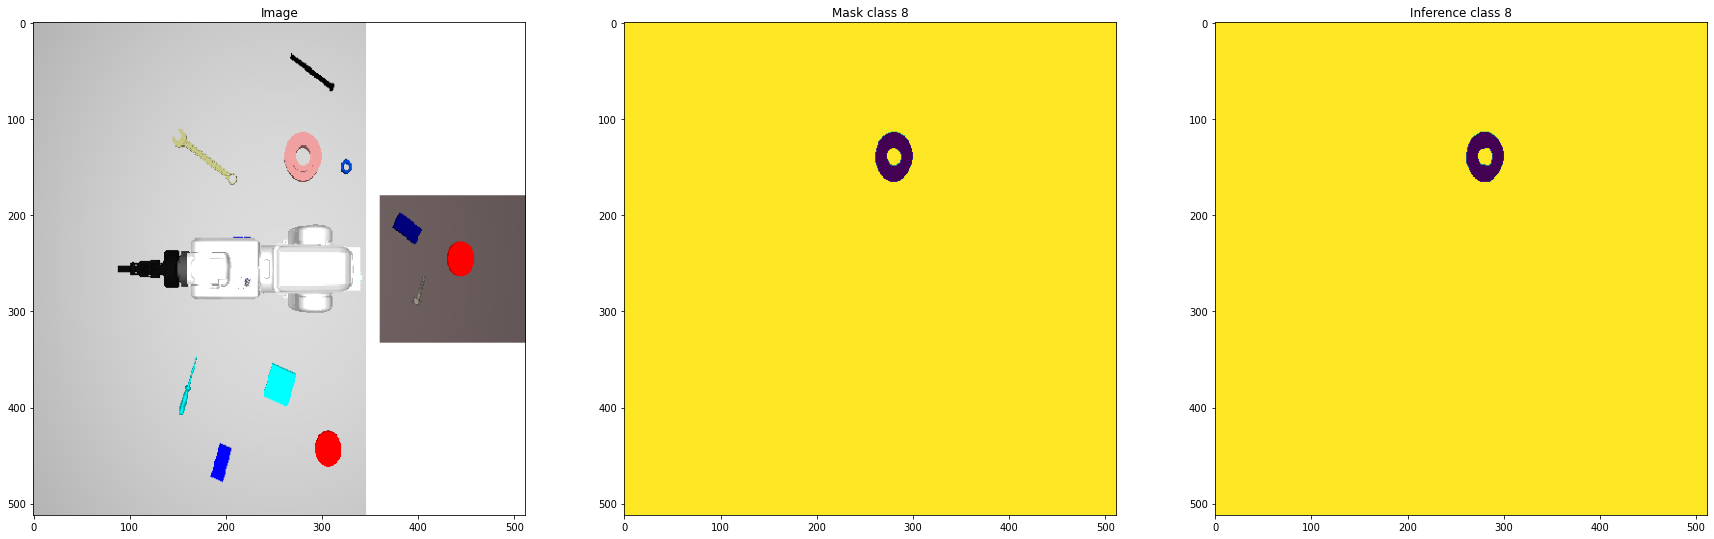

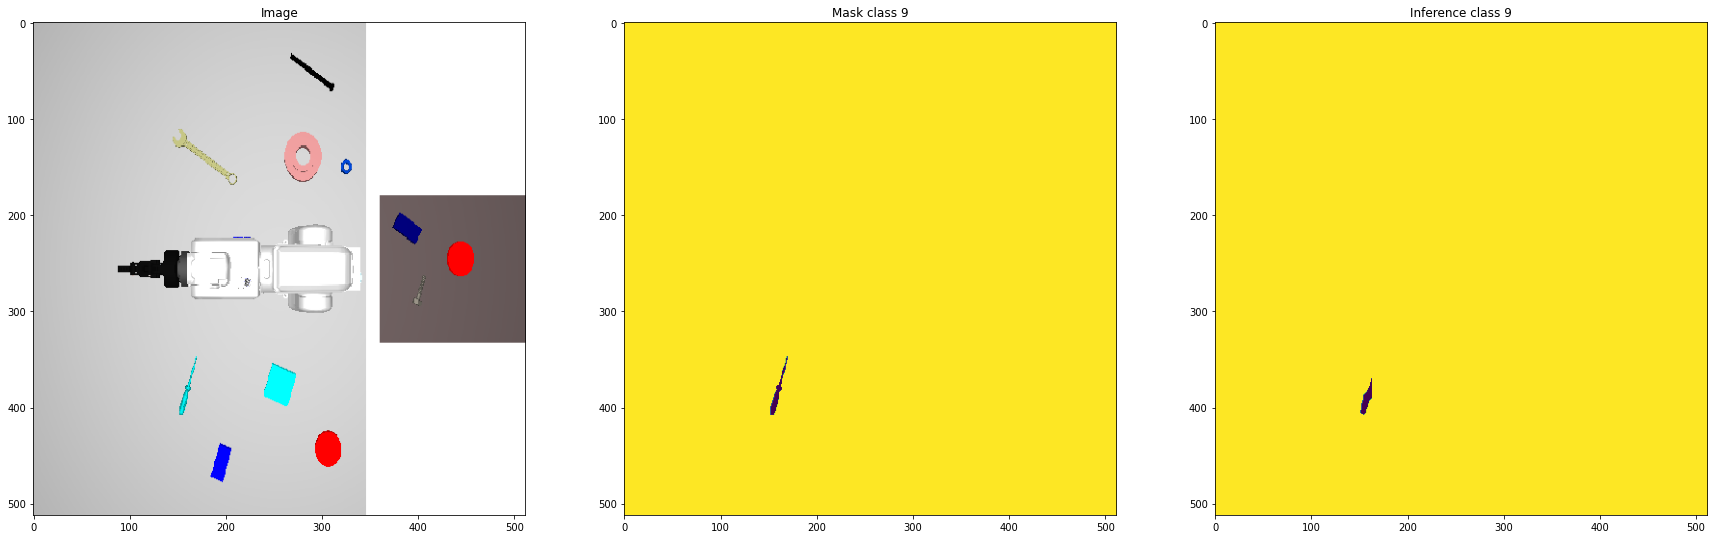

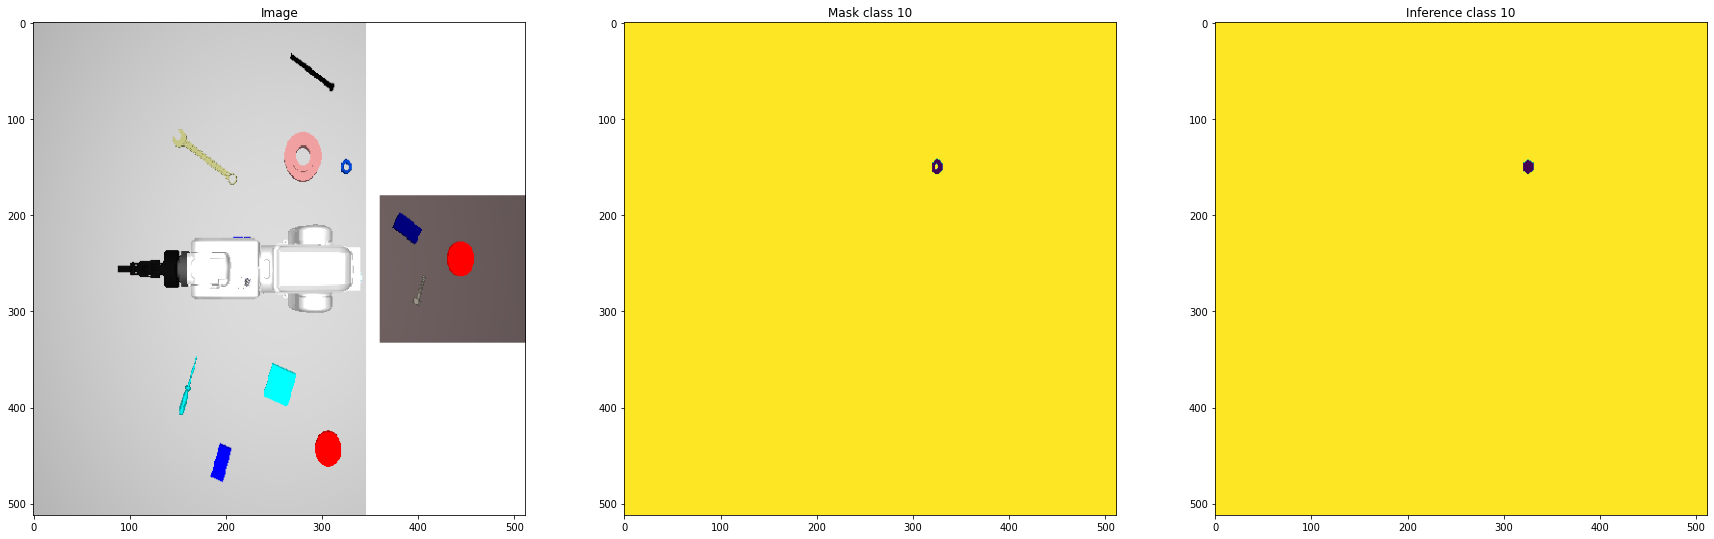

In [ ]:
for indexs in test_dataframe[0:1]:
  for Current_class in range(11):
    img_name = indexs.split('/')[-1]
    path_img = './Images/{}'.format(img_name)
    path_mask = './Mask/{}'.format(img_name)

    x = cv2.imread(path_img,cv2.IMREAD_ANYDEPTH)
    x = cv2.resize(x, (512,512) , interpolation = cv2.INTER_NEAREST)

    y_true = cv2.imread(path_mask,cv2.IMREAD_ANYDEPTH)
    y_true = cv2.resize(y_true, (512,512) , interpolation = cv2.INTER_NEAREST)
    y_true = np.expand_dims(y_true,axis=0)
    x=x/255
    x=np.stack((x,)*3, axis=-1)
    x = np.expand_dims(x,axis=0)
    preds = model.predict(x)
    preds = np.argmax(preds,axis=-1)  
    y_true[y_true==13]=11
    y_true[y_true!=Current_class]=255
    preds[preds!=Current_class]=255
    plt.figure(figsize=(30,30))
    plt.subplot(231)
    plt.title('Image')
    x = cv2.imread(path_img,1)
    x = cv2.resize(x, (512,512) , interpolation = cv2.INTER_NEAREST)
    plt.imshow(x)
    plt.subplot(232)
    plt.title('Mask class {}'.format(Current_class))
    y_true = np.squeeze(y_true,axis=0)
    preds = np.squeeze(preds,axis=0)
    plt.imshow(y_true)
    plt.subplot(233)
    plt.title('Inference class {}'.format(Current_class))
    plt.imshow(preds)